### Name-Harsh Yadav

### Importing the data of flower

In [18]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

### Data splinting into two class

In [24]:
# Extract features (X) and target variable (y)
X = iris.data
y = iris.target

# Virginica class will be labeled as 1 and non-virginica classes (setosa and versicolor) will be labeled as 0
y_binary = np.where(y == 2, 1, 0)

# Check the distribution of the new target variable
print("Original data:", iris.target_names)
print("New data:", np.unique(y_binary))
print("Class counts:", np.bincount(y_binary))


Original data: ['setosa' 'versicolor' 'virginica']
New data: [0 1]
Class counts: [100  50]


### Plotting target value for two classes

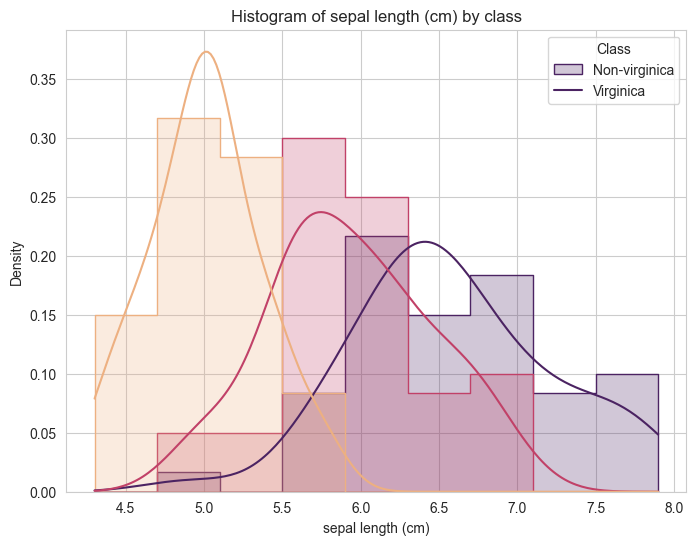

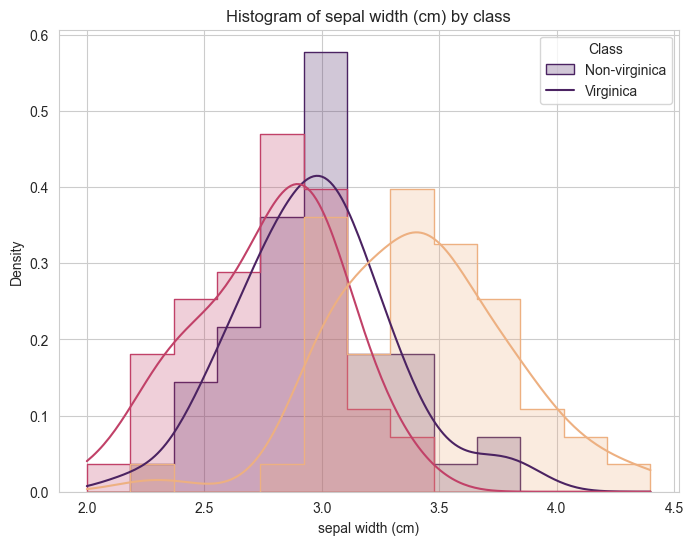

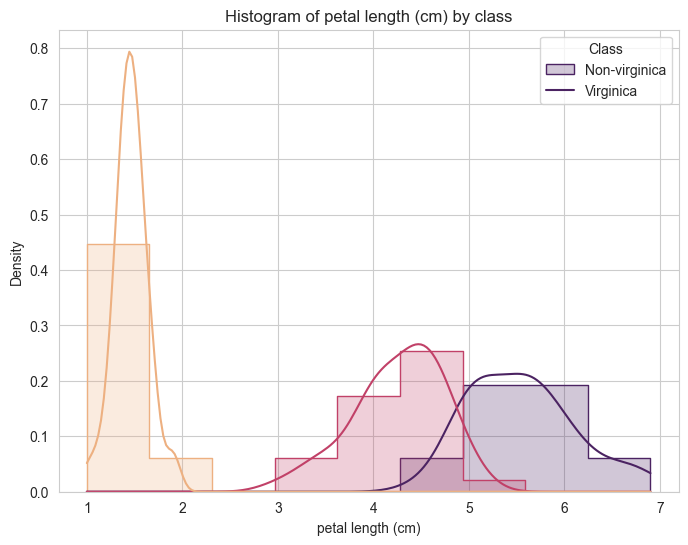

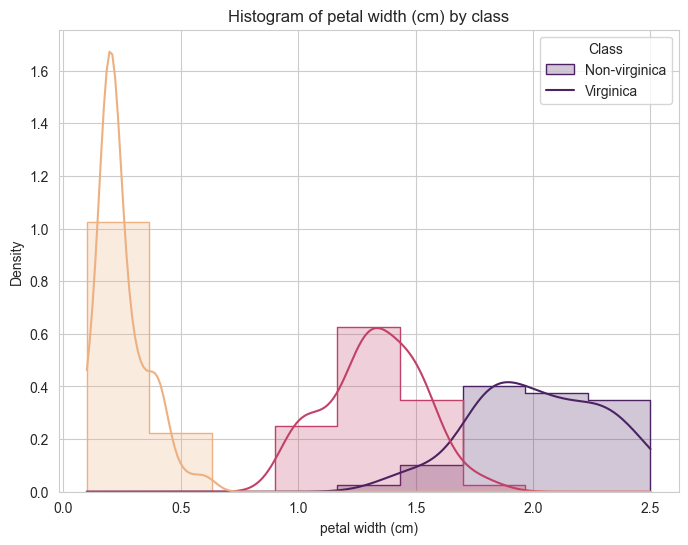

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


# Histograms for each feature
for feature in iris.feature_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='target', kde=True, palette='flare', element='step', stat='density')
    plt.title(f'Histogram of {feature} by class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Class', labels=['Non-virginica', 'Virginica'])
    plt.show()


## Finding correlation between features

In [17]:
df_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


### Plotting heatmap of correlation

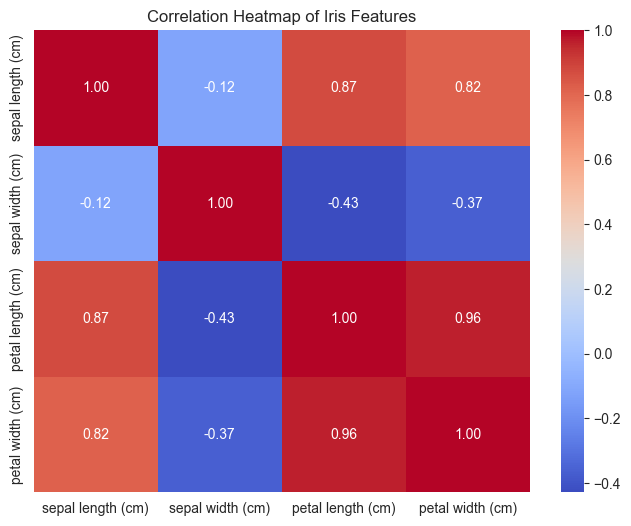

In [31]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Iris Features')
plt.show()